In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, VerticalPitch, Sbopen
import pandas as pd

In [3]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)

In [3]:
df.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,dribble_overrun,block_deflection,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
0,080231d5-1070-4484-b6f6-d73ec50c7fc0,1,1,00:00:00,0,0,1,0.00000,69301,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a29f6be5-aae4-431f-9741-ac6792f51007,2,1,00:00:00,0,0,1,0.00000,69301,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52d31509-0385-4d88-9877-14afe3cb43a9,3,1,00:00:00,0,0,1,0.00000,69301,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e08133a4-d370-42b7-977b-251effa1ed40,4,1,00:00:00,0,0,1,0.00000,69301,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8d5673e4-0d1b-48a1-8945-38f7ea98c548,5,1,00:00:00.140000,0,0,2,0.16873,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'outcome_id', 'outcome_name', 'out', 'counterpress', 'pass_deflected',
       'pass_switch', 'technique_id', 'technique_name', 'pass_cross',
       'off_camera', 'shot_statsbomb_xg', 'end_z', 'shot_first_time',
       'goalkeeper_position_id', 'goalkeeper_position_name',
       'ball_recovery_recovery_failure', 'pass_assisted_shot_id',
       'pass_shot_assist', 'shot_key_pass_id', 'foul_won_defensiv

In [4]:
team1, team2 = df.team_name.unique()
team1, team2

("England Women's", "Sweden Women's")

In [6]:
df.type_name.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Pressure', 'Ball Recovery', 'Clearance', 'Block', 'Dispossessed',
       'Duel', 'Dribbled Past', 'Dribble', 'Interception', 'Goal Keeper',
       'Miscontrol', 'Foul Committed', 'Foul Won', 'Injury Stoppage',
       'Error', 'Shot', 'Substitution', 'Half End', 'Tactical Shift',
       'Bad Behaviour'], dtype=object)

In [5]:
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

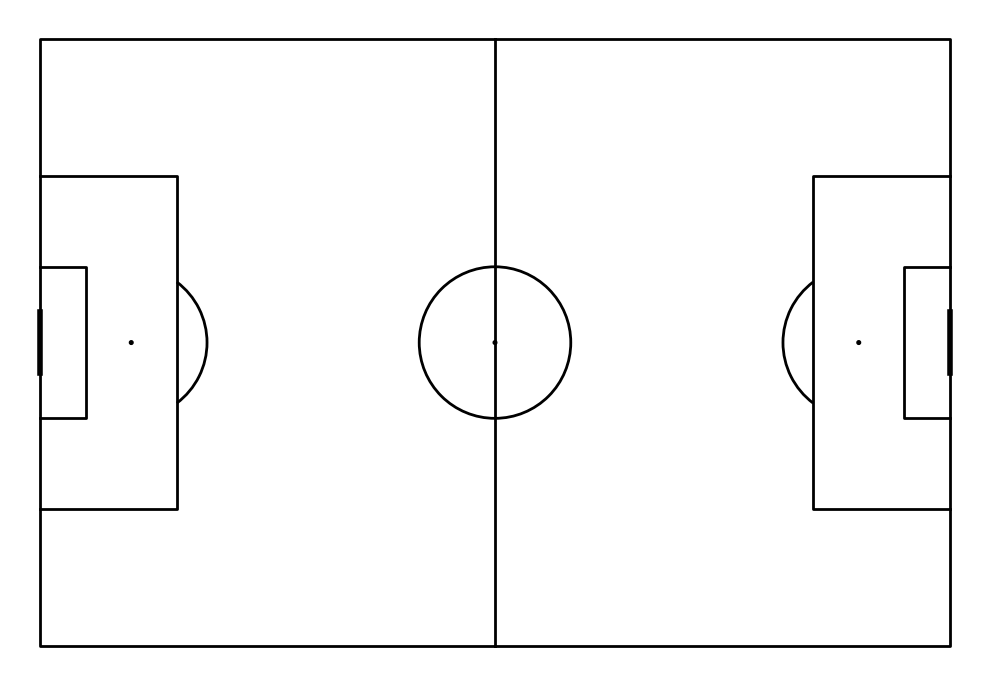

In [8]:
pitch = Pitch(line_color = 'black')
# fig, ax = pitch.draw()
fig, ax = pitch.draw(figsize=(10,7))

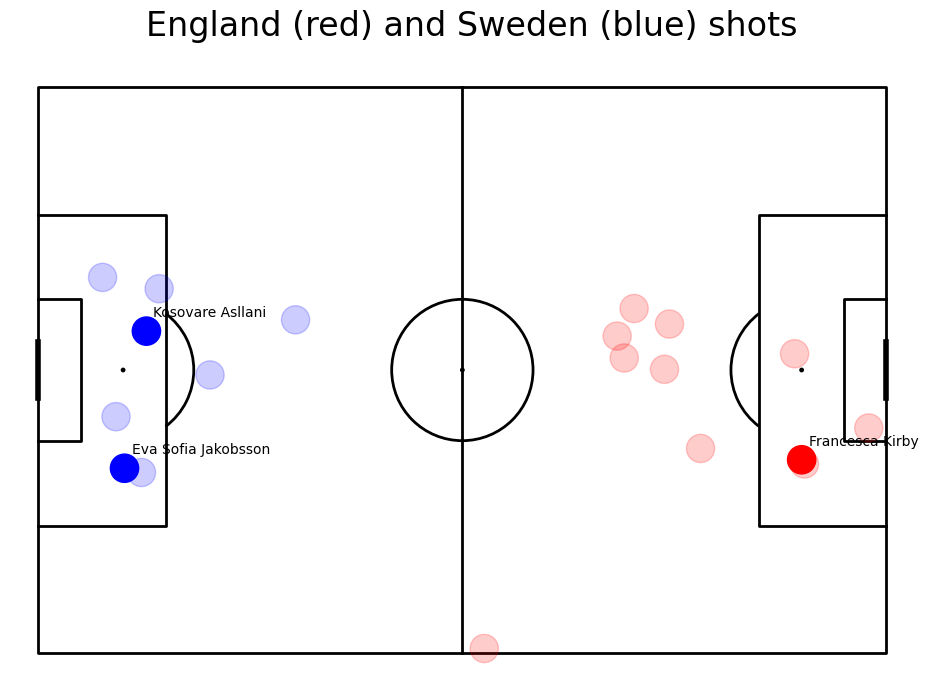

In [11]:
pitch = Pitch(line_color = 'black')
# fig, ax = pitch.draw()
fig, ax = pitch.draw(figsize=(10,7))

pitch_width_x = 120
pitch_length_y = 80

for i, row in shots.iterrows():
    x = row['x']
    y = row['y']
    team_name = row['team_name']

    circle_size = 2

    if (team_name == team1):
        if (row['outcome_name'] == 'Goal'):
            shot_circle = plt.Circle((x, y), circle_size, color = 'red')
            plt.text(x+1, y-2, row['player_name'])
        else:
            shot_circle = plt.Circle((x, y), circle_size, color = 'red', alpha = 0.2)

    else:
        if (row['outcome_name'] == 'Goal'):
            shot_circle = plt.Circle((pitch_width_x - x, pitch_length_y - y), circle_size, color = 'blue')
            plt.text(pitch_width_x - x + 1, pitch_length_y - y -2, row['player_name'])
        else:
            shot_circle = plt.Circle((pitch_width_x - x, pitch_length_y - y), circle_size, color = 'blue', alpha = 0.2)

    ax.add_patch(shot_circle)

fig.suptitle('England (red) and Sweden (blue) shots', fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()
            
            
            

### using mplsoccer pitch class

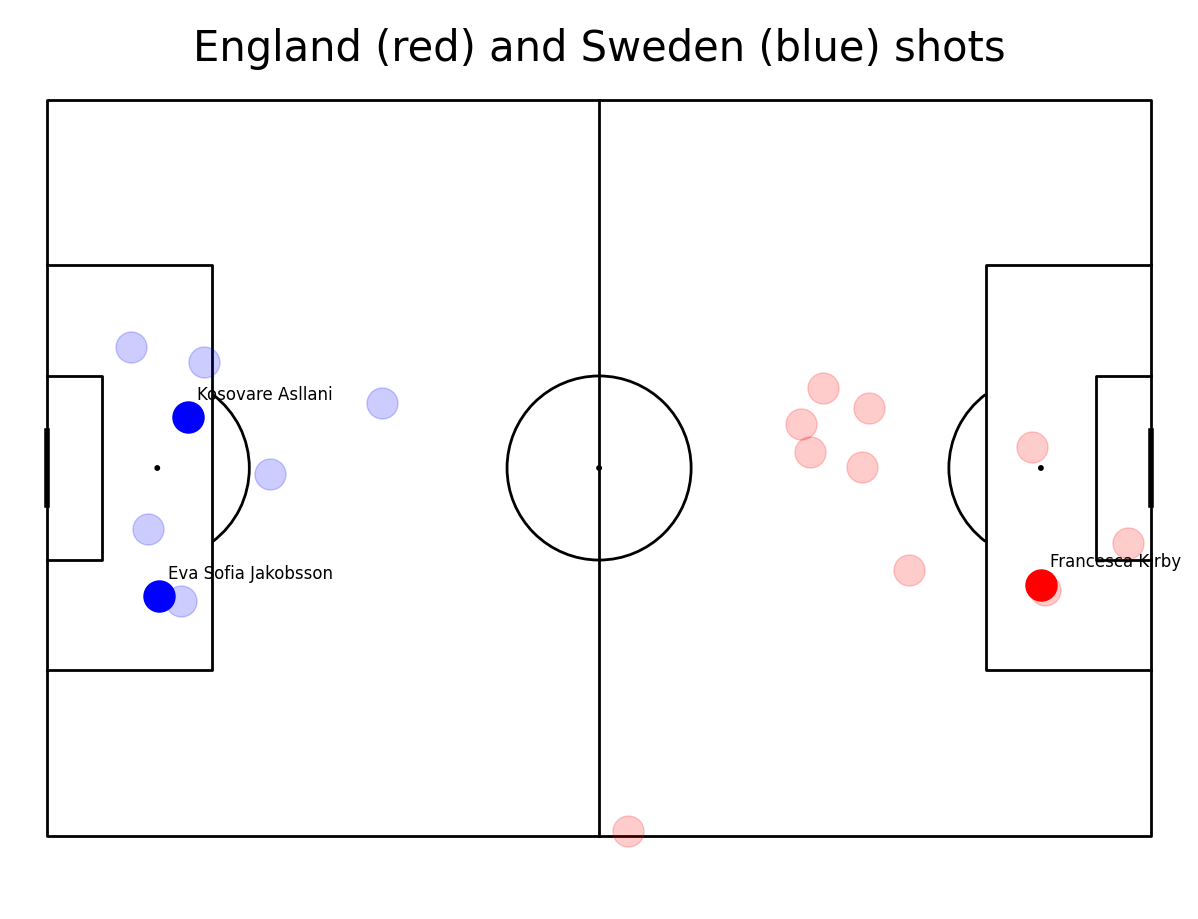

In [12]:
pitch = Pitch(line_color = 'black')
fig, ax = pitch.grid(grid_height = 0.90, title_height = 0.06,
                    axis = False, endnote_height = 0.04,
                    title_space = 0, endnote_space = 0)

england = (df.team_name == team1) & (df.type_name == 'Shot')
df_england = df.loc[england, ['x', 'y', 'outcome_name', 'player_name']]

for i, row in df_england.iterrows():
    if row['outcome_name'] == 'Goal':
        pitch.scatter(row.x, row.y, s = 500, alpha = 1, color = 'red', ax = ax['pitch'])
        pitch.annotate(row['player_name'], (row.x + 1, row.y - 2), ax = ax['pitch'], fontsize = 12)
    else:
        pitch.scatter(row.x, row.y, s = 500, alpha = 0.2, color = 'red', ax = ax['pitch'])


sweden = (df.team_name == team2) & (df.type_name == 'Shot')
df_sweden = df.loc[sweden, ['x', 'y', 'outcome_name', 'player_name']]

for i, row in df_sweden.iterrows():
    if row['outcome_name'] == 'Goal':
        pitch.scatter(120 - row.x, 80 - row.y, s = 500, alpha = 1, color = 'blue', ax = ax['pitch'])
        pitch.annotate(row['player_name'], (120 - row.x + 1, 80 - row.y - 2), ax = ax['pitch'], fontsize = 12)
    else:
        pitch.scatter(120 - row.x, 80 - row.y, s = 500, alpha = 0.2, color = 'blue', ax = ax['pitch'])

fig.suptitle('England (red) and Sweden (blue) shots', fontsize = 30)
plt.show()

###  One half

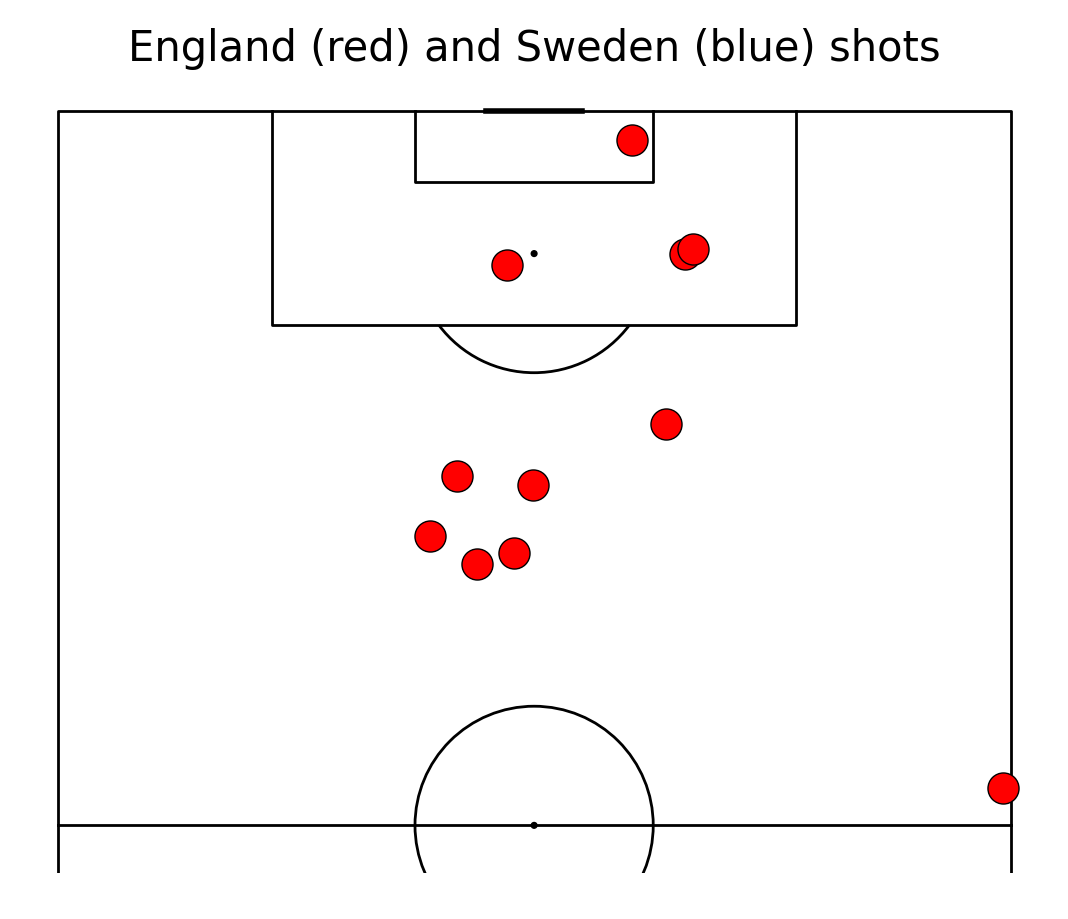

In [15]:
pitch = VerticalPitch(half = True, line_color = 'black')
fig, ax = pitch.grid(grid_height = 0.9, title_height = 0.06, endnote_height = 0.04,
                    axis = False, title_space = 0, endnote_space = 0)
pitch.scatter(df_england.x, df_england.y, s = 500, color = 'red', ax = ax['pitch'], edgecolors = 'black')
fig.suptitle('England (red) and Sweden (blue) shots', fontsize = 30)
plt.show()

### Excercise

In [16]:
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'outcome_id', 'outcome_name', 'out', 'counterpress', 'pass_deflected',
       'pass_switch', 'technique_id', 'technique_name', 'pass_cross',
       'off_camera', 'shot_statsbomb_xg', 'end_z', 'shot_first_time',
       'goalkeeper_position_id', 'goalkeeper_position_name',
       'ball_recovery_recovery_failure', 'pass_assisted_shot_id',
       'pass_shot_assist', 'shot_key_pass_id', 'foul_won_defensiv

In [17]:
df.type_name.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Pressure', 'Ball Recovery', 'Clearance', 'Block', 'Dispossessed',
       'Duel', 'Dribbled Past', 'Dribble', 'Interception', 'Goal Keeper',
       'Miscontrol', 'Foul Committed', 'Foul Won', 'Injury Stoppage',
       'Error', 'Shot', 'Substitution', 'Half End', 'Tactical Shift',
       'Bad Behaviour'], dtype=object)

In [21]:
pass_df = df.loc[df.type_name == 'Pass'].reset_index(drop=True)

In [22]:
pass_df.sub_type_name.unique()

array(['Kick Off', nan, 'Throw-in', 'Recovery', 'Corner', 'Goal Kick',
       'Free Kick'], dtype=object)

In [23]:
pass_df.outcome_name.unique()

array([nan, 'Incomplete', 'Out', 'Pass Offside', 'Unknown',
       'Injury Clearance'], dtype=object)

### plot pass start point for sweden

In [25]:
sweden_pass = pass_df.loc[pass_df.team_name == team2].reset_index(drop=True)

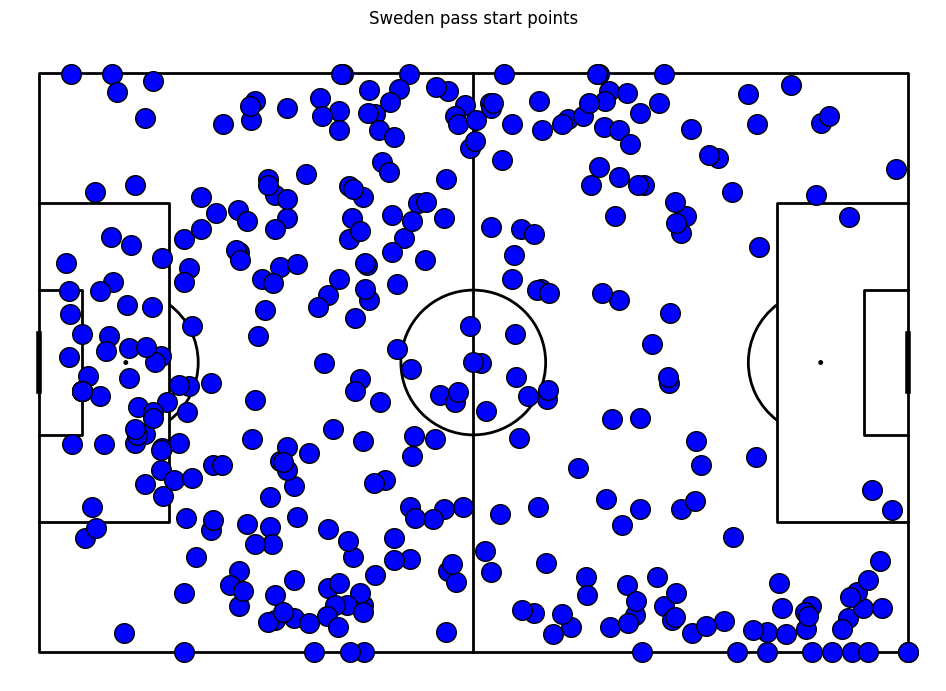

In [29]:
pitch = Pitch(line_color = 'black')
fig, ax = pitch.draw(figsize = (10,7))

pitch.scatter(sweden_pass.x, sweden_pass.y, s = 200, ax = ax, color = 'blue', edgecolors = 'black')
fig.suptitle('Sweden pass start points')
plt.show()

### Plot only passes made by Caroline Serger

In [37]:
pass_df.query("player_name.str.contains('Caroline')").loc[:,['player_name','team_name']]

,player_name,team_name
58,Sara Caroline Seger,Sweden Women's
91,Sara Caroline Seger,Sweden Women's
121,Sara Caroline Seger,Sweden Women's
129,Sara Caroline Seger,Sweden Women's
132,Sara Caroline Seger,Sweden Women's
153,Sara Caroline Seger,Sweden Women's
159,Sara Caroline Seger,Sweden Women's
163,Sara Caroline Seger,Sweden Women's
185,Sara Caroline Seger,Sweden Women's
421,Sara Caroline Seger,Sweden Women's


In [38]:
caroline_df = pass_df.query("player_name.str.contains('Caroline')")

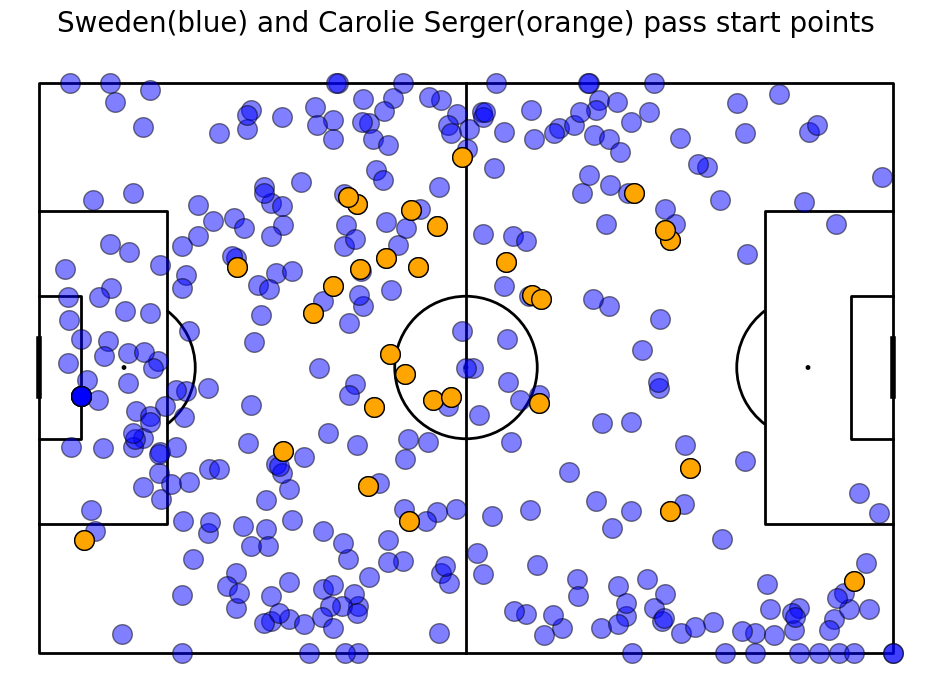

In [40]:
pitch = Pitch(line_color = 'black')
fig, ax = pitch.draw(figsize = (10,7))

pitch.scatter(sweden_pass.x, sweden_pass.y, s = 200, ax = ax, alpha = 0.5, color = 'blue', edgecolors = 'black')
pitch.scatter(caroline_df.x, caroline_df.y, s = 200, ax = ax, alpha = 1, color = 'orange', edgecolors = 'black')
fig.suptitle('Sweden(blue) and Carolie Serger(orange) pass start points', fontsize = 20)
plt.show()

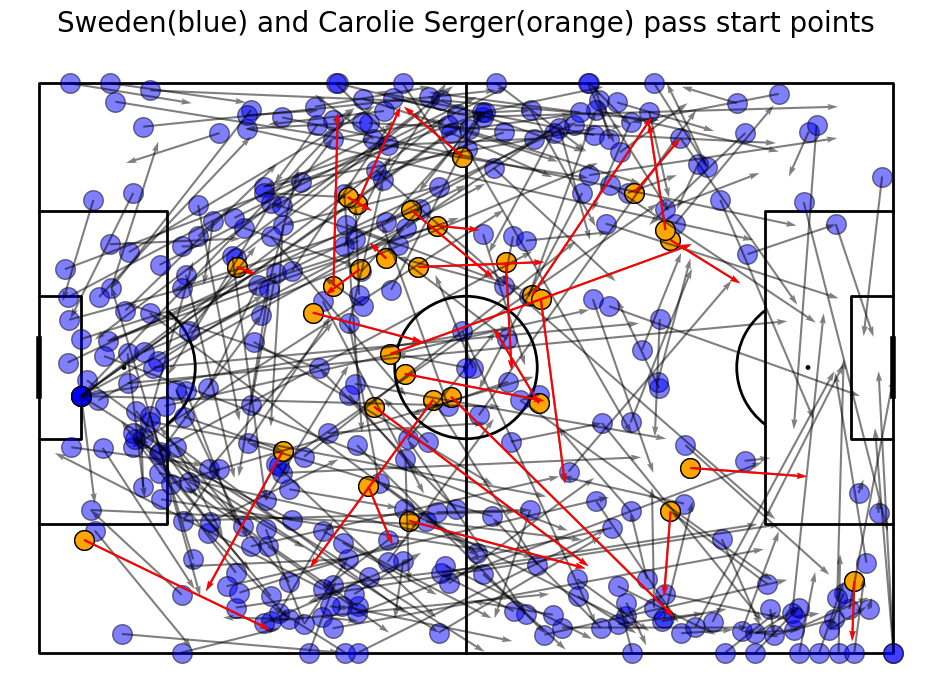

In [49]:
pitch = Pitch(line_color = 'black')
fig, ax = pitch.draw(figsize = (10,7))

pitch.scatter(sweden_pass.x, sweden_pass.y, s = 200, ax = ax, alpha = 0.5, color = 'blue', edgecolors = 'black')
pitch.scatter(caroline_df.x, caroline_df.y, s = 200, ax = ax, alpha = 1, color = 'orange', edgecolors = 'black')
pitch.arrows(sweden_pass.x, sweden_pass.y,sweden_pass.end_x, sweden_pass.end_y, ax = ax,
             width = 1.5, alpha = 0.5, color = 'black')
pitch.arrows(caroline_df.x, caroline_df.y,caroline_df.end_x, caroline_df.end_y, ax = ax,
             width = 1.5, alpha = 1, color = 'red')
fig.suptitle('Sweden(blue) and Carolie Serger(orange) pass start points', fontsize = 20)
plt.show()

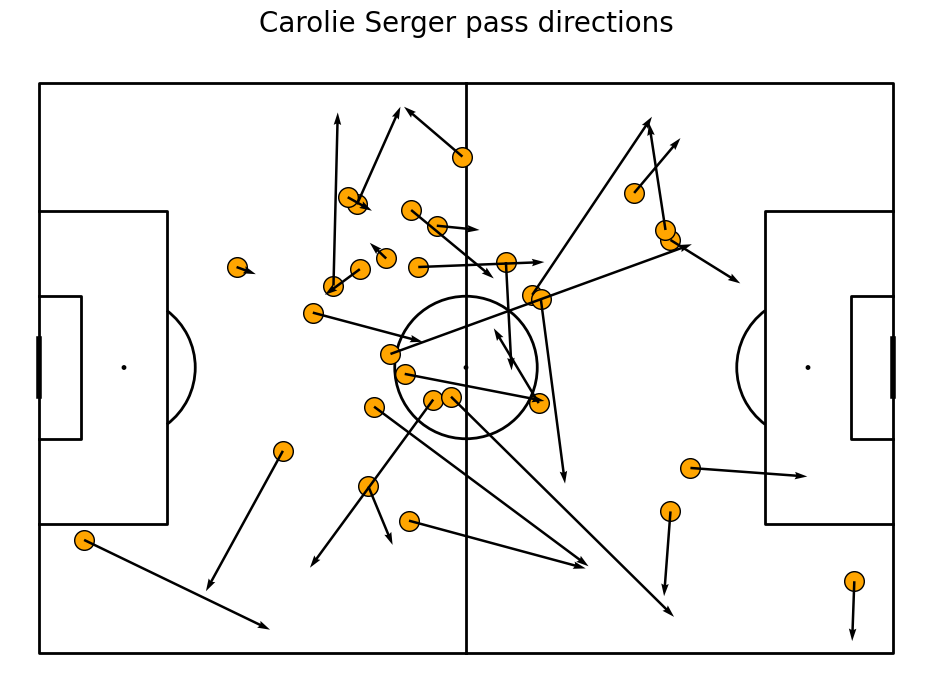

In [58]:
pitch = Pitch(line_color = 'black')
fig, ax = pitch.draw(figsize = (10,7))

pitch.scatter(caroline_df.x, caroline_df.y, s = 200, ax = ax, alpha = 1, color = 'orange', edgecolors = 'black')
# pitch.annotate((caroline_df.x,caroline_df.y), (caroline_df.x - 1, caroline_df.y + 2), ax = ax, fontsize = 10)
pitch.arrows(caroline_df.x, caroline_df.y,caroline_df.end_x, caroline_df.end_y, ax = ax,
             width = 1.8, alpha = 1, color = 'black')
fig.suptitle('Carolie Serger pass directions', fontsize = 20)
plt.show()

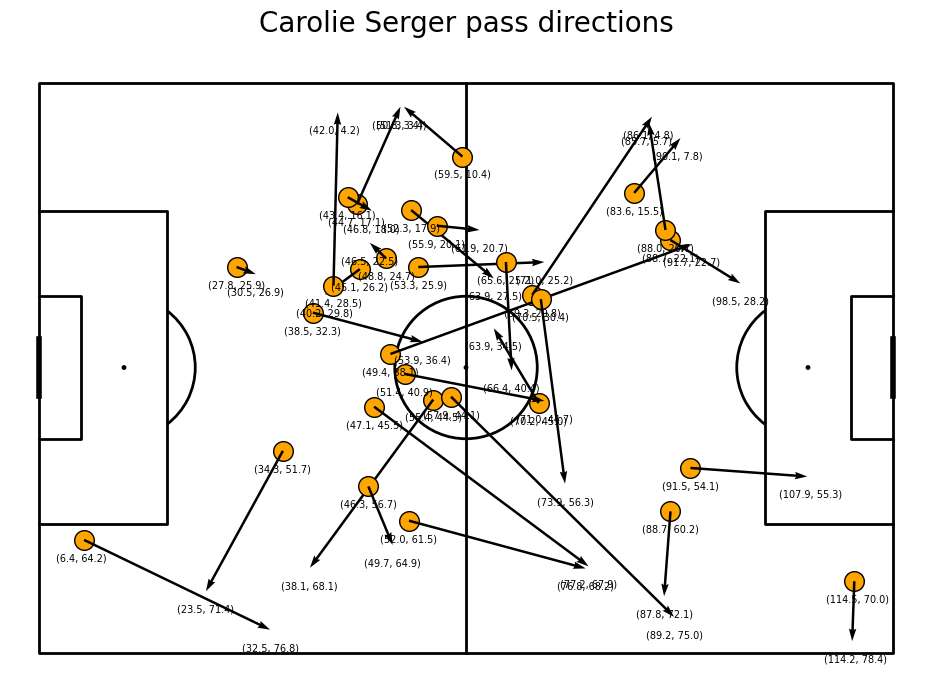

In [63]:
pitch = Pitch(line_color = 'black')
fig, ax = pitch.draw(figsize = (10,7))

for i, row in caroline_df.iterrows():
    pitch.scatter(row.x, row.y, s = 200, ax = ax, alpha = 1, color = 'orange', edgecolors = 'black')
    pitch.annotate((row.x,row.y), (row.x - 4, row.y + 3), ax = ax, fontsize = 7, color = 'black')
    pitch.arrows(row.x, row.y,row.end_x, row.end_y, ax = ax,
                 width = 1.8, alpha = 1, color = 'black')
    pitch.annotate((row.end_x,row.end_y), (row.end_x - 4, row.end_y + 3), ax = ax, fontsize = 7, color = 'black')
    
    
fig.suptitle('Carolie Serger pass directions', fontsize = 20)
plt.show()